In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import geopandas as gpd
from geopandas import GeoDataFrame, GeoSeries
from geoplot import core
from shapely.geometry import Point
import folium
import os
import requests
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def download_file(url, path, update=False):
    """
    Helper method handling downloading large files from `url` to `filename`. Returns a pointer to `filename`.
    
    Will simply return the `filename` immediately if it's already available locally.
    """
    if os.path.isfile(path) and not update:
        return path
    else:
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
        return path

# Test datasets

In [3]:
cities = gpd.read_file(gpd.datasets.get_path(gpd.datasets.available[0]))

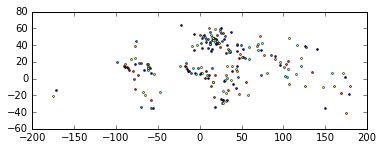

In [4]:
cities.plot()

In [5]:
countries = gpd.read_file(gpd.datasets.get_path(gpd.datasets.available[1]))

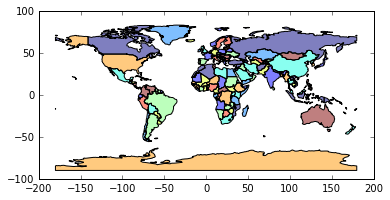

In [6]:
countries.plot()

In [10]:
path = download_file("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD",
                     "NYPD Motor Vehicle Collisions.csv")
collisions = pd.read_csv(path, index_col=23)
collisions = GeoDataFrame(collisions,
                          geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))
collisions.drop(['LATITUDE', 'LONGITUDE', 'LOCATION'], inplace=True, axis='columns')

In [26]:
# collisions.plot() --- fails!

# Point Plot

In [48]:
sample_10

DATE   TIME    BOROUGH  ZIP CODE        ON STREET NAME  \
UNIQUE KEY                                                                 
3329941     11/06/2015  22:50  MANHATTAN   10037.0       WEST 132 STREET   
3323598     10/26/2015  15:13        NaN       NaN                   NaN   
319942      04/12/2014  11:30        NaN       NaN             47 STREET   
1004877     08/02/2014  21:00  MANHATTAN   10027.0       WEST 127 STREET   
3437807     04/19/2016  15:50      BRONX   10451.0       EAST 161 STREET   
103903      12/18/2012  18:22      BRONX   10461.0  PELHAM PARKWAY SOUTH   
3126053     11/24/2014  15:00        NaN       NaN                   NaN   
3357477     12/20/2015  20:41   BROOKLYN   11203.0        CLARENDON ROAD   
106357      12/21/2013  19:40      BRONX   10461.0        LURTING AVENUE   
115963      12/31/2013   9:00   BROOKLYN   11224.0         WEST 6 STREET   

             CROSS STREET NAME OFF STREET NAME  NUMBER OF PERSONS INJURED  \
UNIQUE KEY                                                                  
3329941               5 AVENUE             NaN                          0   
3323598                    NaN             NaN                          0   
319942      ASTORIA BLVD NORTH             NaN                          0   
1004877           LENOX AVENUE             NaN                          0   
3437807        SHERIDAN AVENUE             NaN                          1   
103903           HAIGHT AVENUE             NaN                          0   
3126053                    NaN             NaN                          0   
3357477         EAST 39 STREET             NaN                          1   
106357               ESPLANADE             NaN                          0   
115963           SHORE PARKWAY             NaN                          1   

            NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
UNIQUE KEY                                                            
3329941                            0                              0   
3323598                            0                              0   
319942                             0                              0   
1004877                            0                              0   
3437807                            0                              0   
103903                             0                              0   
3126053                            0                              0   
3357477                            0                              1   
106357                             0                              0   
115963                             0                              0   

                            ...                    \
UNIQUE KEY                  ...                     
3329941                     ...                     
3323598                     ...                     
319942                      ...                     
1004877                     ...                     
3437807                     ...                     
103903                      ...                     
3126053                     ...                     
3357477                     ...                     
106357                      ...                     
115963                      ...                     

            CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
UNIQUE KEY                                                                 
3329941                       Unspecified                            NaN   
3323598                       Unspecified                            NaN   
319942                        Unspecified                            NaN   
1004877                       Unspecified                            NaN   
3437807                       Unspecified                    Unspecified   
103903                        Unspecified                            NaN   
3126053                   Other Vehicular                            NaN   
335747

In [76]:
folium.CircleMarker?

In [114]:
core.point(cities)

In [119]:
folium.Map?

In [122]:
sample_10 = collisions.sample(10)
print("Plotting <=10 points.")
core.point(sample_10, radius=sample_10['ZIP CODE'], radial_func=lambda x: x / 1000)

Plotting <=10 points.


In [67]:
sample_100 = collisions.sample(100)
print("Plotting <=100 points.")
%time core.point(sample_100)

Plotting <=100 points.
Wall time: 639 ms


In [73]:
sample_250 = collisions.sample(250)
print("Plotting <=250 points.")
%time core.point(sample_250)

Plotting <=250 points.
Wall time: 1.42 s


In [71]:
sample_500 = collisions.sample(500)
print("Plotting <=500 points.")
%time core.point(sample_500)

Plotting <=500 points.
Wall time: 2.98 s


In [68]:
sample_1000 = collisions.sample(1000)
print("Plotting <=1000 points.")
%time core.point(sample_1000)

Plotting <=1000 points.
Wall time: 5.65 s


In [69]:
sample_10000 = collisions.sample(10000)
print("Plotting <=10000 points.")
%time core.point(sample_10000)

Plotting <=10000 points.
Wall time: 55.4 s
